# Importa√ß√£o das Bibliotecas

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from composicao_estatisticas import composicao_histograma_boxplot
from composicao_estatisticas import calcular_estatisticas
from composicao_estatisticas import teste_f_variancias

# Leitura e An√°lis da Base

In [2]:
# Leitura da planilha 
DADOS = r"C:\Users\rodri\OneDrive\Sincroniza√ß√£o\Documentos\GitHub\hypothesis_test_human_development_index\dados\idhm_educacao_teste_hipoteses.xlsx"
df = pd.read_excel(DADOS)

# Visualizar as primeiras linhas da tabela
df.head()

IDHM_Educacao Nordeste  IDHM_Educacao Sul  IDHM_Educacao Norte
0                   0.698              0.702                0.658
1                   0.679              0.768                0.673
2                   0.695              0.712                0.749
3                   0.668              0.800                0.638
4                   0.694              0.768                0.658

In [3]:
# Visualizar as √∫ltimas linhas da tabela
df.tail()

IDHM_Educacao Nordeste  IDHM_Educacao Sul  IDHM_Educacao Norte
1789                   0.391                NaN                  NaN
1790                   0.390                NaN                  NaN
1791                   0.488                NaN                  NaN
1792                   0.502                NaN                  NaN
1793                   0.459                NaN                  NaN

In [4]:
# Conferir os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDHM_Educacao Nordeste  1794 non-null   float64
 1   IDHM_Educacao Sul       1189 non-null   float64
 2   IDHM_Educacao Norte     449 non-null    float64
dtypes: float64(3)
memory usage: 42.2 KB


# Identifica√ß√£o do Problema

A Secretaria da Educa√ß√£o solicitou a an√°lise do IDHM Educa√ß√£o por regi√£o para avaliar se a diferen√ßa no √≠ndice, observada entre as regi√µes, √© estatisticamente significante. Para isso, consolidou a base de dados das 3 principais regi√µes a serem avaliadas: Norte, Nordeste e Sul com uma amostra de seus munic√≠pios.

Este trablho consiste em 3 tarefas principais:
- Construir histogramas para cada regi√£o e avaliar se as distribui√ß√µes se aproximam da Normal
- Calcular as medidas resumo por regi√£o: n√∫mero de observa√ß√µes, m√©dia e desvio padr√£o
- Realizar um Teste de Hip√≥teses para comparar se a m√©dia do IDHM Educa√ß√£o √© diferente entre as regi√µes: Nordeste e Sul e Norte e Nordeste

Para cada Teste de Hip√≥teses, ser√£o realizados os seguintes passos:

- Formular as hip√≥teses a serem testadas
- Avaliar se as vari√¢ncias do IDHM entre as regi√µes podem ser consideradas iguais para selecionar o teste mais adequado
- Calcular o p-valor
- Interpretar o resultado do teste considerando um coeficiente de confian√ßa de 5%

## Histogramas por Regi√£o

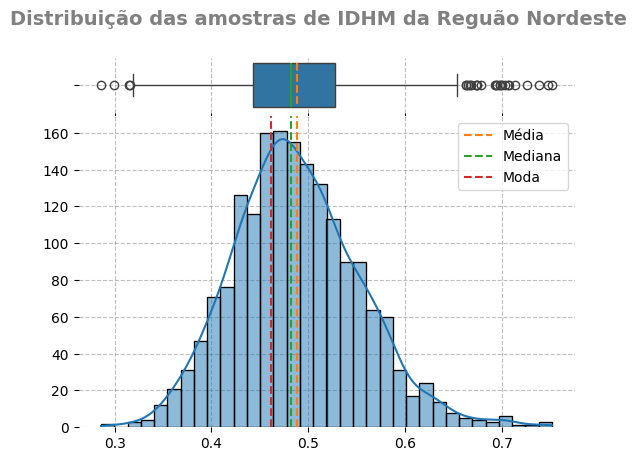

In [5]:
composicao_histograma_boxplot(df, 'IDHM_Educacao Nordeste', titulo="Distribui√ß√£o das amostras de IDHM da Regu√£o Nordeste")

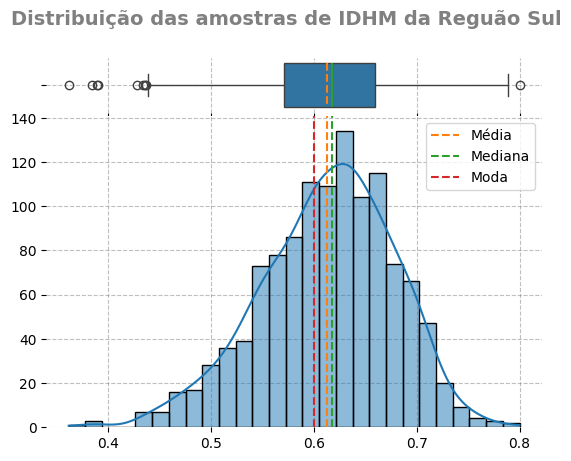

In [6]:
composicao_histograma_boxplot(df, 'IDHM_Educacao Sul', titulo="Distribui√ß√£o das amostras de IDHM da Regu√£o Sul")

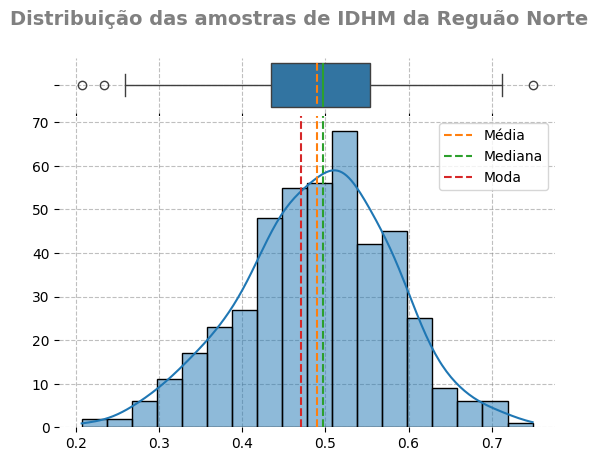

In [7]:
composicao_histograma_boxplot(df, 'IDHM_Educacao Norte', titulo="Distribui√ß√£o das amostras de IDHM da Regu√£o Norte")

## Medidas Resumo por Regi√£o

In [8]:
numero_observacoes = df[['IDHM_Educacao Nordeste', 'IDHM_Educacao Sul', 'IDHM_Educacao Norte']].count()
media = df[['IDHM_Educacao Nordeste', 'IDHM_Educacao Sul', 'IDHM_Educacao Norte']].mean().round(2)
desvio_padrao = df[['IDHM_Educacao Nordeste', 'IDHM_Educacao Sul', 'IDHM_Educacao Norte']].std().round(3)

print("N√∫mero de Observa√ß√µes")
print(numero_observacoes)
print("------------")
print("Compara√ß√£o das m√©dias amostrais")
print(media)
print("------------")
print("Compara√ß√£o dos desvios amostrais")
print(desvio_padrao)

N√∫mero de Observa√ß√µes
IDHM_Educacao Nordeste    1794
IDHM_Educacao Sul         1189
IDHM_Educacao Norte        449
dtype: int64
------------
Compara√ß√£o das m√©dias amostrais
IDHM_Educacao Nordeste    0.49
IDHM_Educacao Sul         0.61
IDHM_Educacao Norte       0.49
dtype: float64
------------
Compara√ß√£o dos desvios amostrais
IDHM_Educacao Nordeste    0.066
IDHM_Educacao Sul         0.065
IDHM_Educacao Norte       0.091
dtype: float64


## Testes de Hip√≥teses

Vamos relembrar os passos definidos para os Testes de Hip√≥teses:

1. Formular as hip√≥teses a serem testadas
2. Avaliar se as vari√¢ncias do IDHM entre as regi√µes podem ser consideradas iguais para selecionar o teste mais adequado
3. Calcular o p-valor
4. Interpretar o resultado do teste considerando um coeficiente de confian√ßa de 5%

### 1. Formula√ß√£o das Hip√≥teses

**Nordeste x Sul**
- H0: A m√©dia do IDHM Educa√ß√£o do Nordeste √© igual √† m√©dia IDHM do Sul, ou: IDHMn = IDHMs
- H1: A m√©dia do IDHM Educa√ß√£o do Nordeste √© menor do que a m√©dia IDHM do Sul, ou: IDHMn < IDHMs

**Nordeste x Sul**
- H0: A m√©dia do IDHM Educa√ß√£o do Nordeste √© igual √† m√©dia IDHM do Norte, ou: IDHMnordeste = IDHMnorte
- H1: A m√©dia do IDHM Educa√ß√£o do Nordeste √© diferente da m√©dia IDHM do Norte, ou: IDHMnordeste < IDHMnorte

### 2. Teste de Hip√≥teses das Vari√¢ncias

In [9]:
# Considerando que as colunas s√£o as amostras de cada regi√£o
amostra_idhm_nordeste = df['IDHM_Educacao Nordeste']
amostra_idhm_norte = df['IDHM_Educacao Norte']
amostra_idhm_sul = df['IDHM_Educacao Sul']

In [10]:
variancia_nordeste = amostra_idhm_nordeste.var(ddof=1).round(4)
variancia_norte = amostra_idhm_norte.var(ddof=1).round(4)
variancia_sul = amostra_idhm_sul.var(ddof=1).round(4)

print("Vari√¢ncia Amostral por Regi√£o:")
print(f"Nordeste: {variancia_nordeste}")
print(f"Norte: {variancia_norte}")
print(f"Sul: {variancia_sul}")

Vari√¢ncia Amostral por Regi√£o:
Nordeste: 0.0043
Norte: 0.0082
Sul: 0.0042


#### Compara√ß√£o das Vari√¢ncias do Sul e Nordeste

In [19]:
# Executando os testes e armazenando os p-valores
p_nordeste_sul = teste_f_variancias(amostra_idhm_nordeste, amostra_idhm_sul, nome1="Nordeste", nome2="Sul")

# Nordeste vs Sul
print("\nüìå Teste F para vari√¢ncias do Nordeste e Sul")
print("=" * 60)
print(" üîπ Regra: p-valor > 5% ‚Üí N√£o rejeitamos H0")
print(f" üîπ Resultado: p-valor = {p_nordeste_sul * 100:.2f}%")
print("Como o p-valor de 69,63% √© maior que 5%, n√£o h√° evid√™ncias para rejeitar que as vari√¢ncias s√£o iguais.")

 TESTE F PARA IGUALDADE DE VARI√ÇNCIAS (Nordeste vs. Sul) 

    H0: As vari√¢ncias de Nordeste e Sul s√£o iguais.
    H1: As vari√¢ncias de Nordeste e Sul s√£o diferentes.
    
 RESULTADOS DO TESTE F 
Vari√¢ncia de Nordeste     : 0.00433
Vari√¢ncia de Sul     : 0.00425
Estat√≠stica F            : 1.01861
Graus de liberdade       : 1793, 1188
--------------------------------------------------
p-valor (bicaudal)       : 73.03%
--------------------------------------------------
Decis√£o: N√£o rejeitamos H0 ‚Üí As vari√¢ncias s√£o estatisticamente iguais.

üìå Teste F para vari√¢ncias do Nordeste e Sul
 üîπ Regra: p-valor > 5% ‚Üí N√£o rejeitamos H0
 üîπ Resultado: p-valor = 73.03%
Como o p-valor de 69,63% √© maior que 5%, n√£o h√° evid√™ncias para rejeitar que as vari√¢ncias s√£o iguais.


#### Compara√ß√£o das Vari√¢ncias do Norte e Nordeste

In [18]:
p_norte_nordeste = teste_f_variancias(amostra_idhm_norte, amostra_idhm_nordeste, nome1="Norte", nome2="Nordeste")

# Norte vs Nordeste
print("\nüìå Teste F para vari√¢ncias do Norte e Nordeste")
print("=" * 60)
print(" üîπ Regra: p-valor < 5% ‚Üí Rejeitamos H0")
print(f" üîπ Resultado: p-valor = {p_norte_nordeste * 100:.2f}%")
print("H√° evid√™ncias para rejeitar que as vari√¢ncias s√£o iguais, ent√£o consideraremos as vari√¢ncias diferentes.")
print("=" * 60)

 TESTE F PARA IGUALDADE DE VARI√ÇNCIAS (Norte vs. Nordeste) 

    H0: As vari√¢ncias de Norte e Nordeste s√£o iguais.
    H1: As vari√¢ncias de Norte e Nordeste s√£o diferentes.
    
 RESULTADOS DO TESTE F 
Vari√¢ncia de Norte     : 0.00822
Vari√¢ncia de Nordeste     : 0.00433
Estat√≠stica F            : 1.89941
Graus de liberdade       : 1793, 1793
--------------------------------------------------
p-valor (bicaudal)       : 0.00%
--------------------------------------------------
Decis√£o: Rejeitamos H0 ‚Üí As vari√¢ncias s√£o significativamente diferentes.

üìå Teste F para vari√¢ncias do Norte e Nordeste
 üîπ Regra: p-valor < 5% ‚Üí Rejeitamos H0
 üîπ Resultado: p-valor = 0.00%
H√° evid√™ncias para rejeitar que as vari√¢ncias s√£o iguais, ent√£o consideraremos as vari√¢ncias diferentes.


### 3. Teste de Hip√≥teses para Duas Popula√ß√µes

#### Nordeste x Sul

In [26]:
# Teste de Hip√≥teses: m√©dia de duas popula√ß√µes
print("="*40)
print(" TESTE F PARA IGUALDADE DE VARI√ÇNCIAS ")
print("="*40)
print("""
Como o p-valor √© menor que 5%, rejeitamos H0.
Ent√£o existem evid√™ncias estat√≠sticas que o IDHM do Nordeste √© menor que o do Sul.

Relembrando as hip√≥teses definidas:
H0: A m√©dia do IDHM Educa√ß√£o do Nordeste √© igual √† m√©dia IDHM do Sul, ou: IDHMnordeste = IDHMsul
H1: A m√©dia do IDHM Educa√ß√£o do Nordeste √© menor do que a m√©dia IDHM do Sul, ou: IDHMnordeste < IDHMsul
""")
print("="*40)

# Reutilizando as colunas com as amostras das regi√µes Nordeste e Sul
amostra_idhm_nordeste = df['IDHM_Educacao Nordeste'].dropna()
amostra_idhm_sul = df['IDHM_Educacao Sul'].dropna()

# C√°lculo das vari√¢ncias amostrais
variancia_nordeste = amostra_idhm_nordeste.var(ddof=1).round(4)
variancia_sul = amostra_idhm_sul.var(ddof=1).round(4)

# Verifica√ß√£o das vari√¢ncias para definir o tipo de teste t
if variancia_sul / variancia_nordeste < 1.5 and variancia_nordeste / variancia_sul < 1.5:  # Crit√©rio emp√≠rico
    equal_var = True
else:
    equal_var = False
    
# Teste t de Student (para comparar m√©dias)
t_stat, p_val = stats.ttest_ind(amostra_idhm_sul, amostra_idhm_nordeste, equal_var=equal_var)

# Exibi√ß√£o dos resultados
print("=" * 50)
print(" TESTE T PARA M√âDIAS (HIP√ìTESE UNICAUDAL DIREITA) ")
print("=" * 50)
print(f"Estat√≠stica t               : {t_stat:.5f}")
print(f"Vari√¢ncia do Nordeste       : {variancia_nordeste:.5f}")
print(f"Vari√¢ncia do Sul            : {variancia_sul:.5f}")

print("-" * 50)
print(f"p-valor (unicaudal, H1: Sul > Nordeste) : {p_val / 2:.5f}") # Divide por 2 para teste unicaudal
print("-" * 50)

# Defini√ß√£o do n√≠vel de signific√¢ncia
alpha = 0.05

# Teste Unicaudal √† Direita (H1: amostra1 > amostra2)
if t_stat > 0 and (p_val / 2) < alpha:
    print("Rejeitamos H0 ‚Üí A m√©dia do Sul √© significativamente maior que a do Nordeste.")
else:
    print("N√£o rejeitamos H0 ‚Üí N√£o h√° evid√™ncia suficiente para afirmar que a m√©dia do Sul seja maior.")

print("=" * 50)

 TESTE F PARA IGUALDADE DE VARI√ÇNCIAS 

Como o p-valor √© menor que 5%, rejeitamos H0.
Ent√£o existem evid√™ncias estat√≠sticas que o IDHM do Nordeste √© menor que o do Sul.

Relembrando as hip√≥teses definidas:
H0: A m√©dia do IDHM Educa√ß√£o do Nordeste √© igual √† m√©dia IDHM do Sul, ou: IDHMnordeste = IDHMsul
H1: A m√©dia do IDHM Educa√ß√£o do Nordeste √© menor do que a m√©dia IDHM do Sul, ou: IDHMnordeste < IDHMsul

 TESTE T PARA M√âDIAS (HIP√ìTESE UNICAUDAL DIREITA) 
Estat√≠stica t               : 50.82222
Vari√¢ncia do Nordeste       : 0.00430
Vari√¢ncia do Sul            : 0.00420
--------------------------------------------------
p-valor (unicaudal, H1: Sul > Nordeste) : 0.00000
--------------------------------------------------
Rejeitamos H0 ‚Üí A m√©dia do Sul √© significativamente maior que a do Nordeste.


#### Norte x Nordeste